# Introduction to Clustering

## Unsupervised learning: basics

Google News: It scans through the text of each article and based on frequenly occuring terms, groups articles together. 

Unsupervised learning works on unlabeled data to find and inherent structures within the data.

Clustering is used to group similar data points together.

Need to employ more analysis to decipher how many clusters there actually are.

### Pokémon sightings

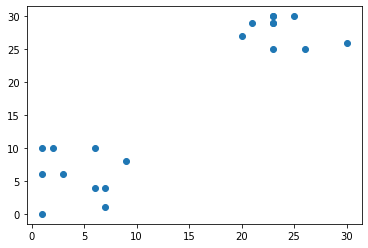

In [1]:
from matplotlib import pyplot as plt
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]
plt.scatter(x, y)
plt.show()

## Basics of cluster analysis

Cluster: Group of items with similar characteristics. The algorithms are hierarchical clustering, K means clustering, density based DBSCAN technique or 
Gaussian models for cluster analysis. 


### Pokémon sightings: hierarchical clustering

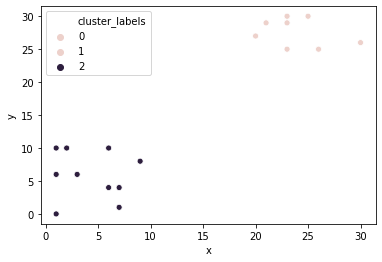

In [2]:
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd
import seaborn as sns
df = pd.DataFrame({"x":x,"y":y})
Z = linkage(df,"ward")
df["cluster_labels"] = fcluster(Z, 2, criterion="maxclust")
sns.scatterplot(x="x",y="y", hue="cluster_labels",data=df)

Notice that the resulting plot has an extra cluster labelled 0 in the legend.

### Pokémon sightings: k-means clustering


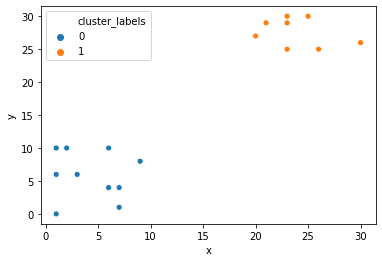

In [15]:
from scipy.cluster.vq import kmeans, vq
df = pd.DataFrame({"x":x,"y":y})
df=df.astype("float")
centroids, _ = kmeans(df, 2)
df["cluster_labels"], _ = vq(df, centroids)
sns.scatterplot(x="x", y="y", hue="cluster_labels", data=df)
plt.show()

## Data preparation for cluster analysis

In the data set variables can have incomparable units (product dimensions in cm and price in $) or variables with same units have vastly different scales and variances (cheap and expensive).

Data in war form may lead to bias in clustering. To avoid having clusters that heavily dependent on one variable **normalization** can be applied. Process of rescaling data to a standard deviation of 1.

[2.72733941 0.54546788 1.63640365 1.63640365 1.09093577 1.63640365
 1.63640365 4.36374306 0.54546788 1.09093577 1.09093577 1.63640365
 2.72733941]


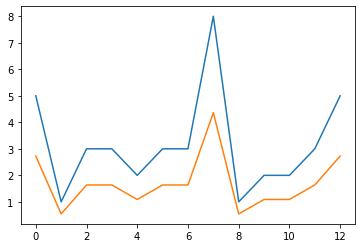

var of scaled data:  0.9999999999999996 
var of original data 3.3609467455621314


In [42]:
from scipy.cluster.vq import whiten
import numpy as np
data = np.array([5,1,3,3,2,3,3,8,1,2,2,3,5])
scaled_data = whiten(data)
print(scaled_data)
plt.plot(data)
plt.plot(scaled_data)
plt.show()
print("var of scaled data: ",scaled_data.var(), "\nvar of original data", data.var())

As it can be seen from the plot the variation in the scaled data has been toned down from the original data although the trends remain similar to the original data.

### Normalize basic list data

In [43]:
goals_for = [4,3,2,3,1,1,2,0,1,4]
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


### Visualize normalized data

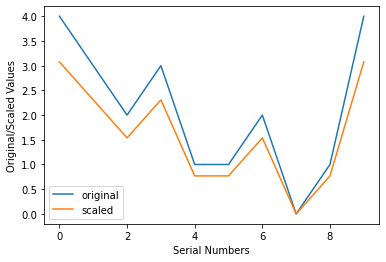

In [46]:
plt.plot(goals_for, label="original")
plt.plot(scaled_data, label="scaled")
plt.xlabel("Serial Numbers")
plt.ylabel("Original/Scaled Values")
plt.legend()
plt.show()

### Normalization of small numbers

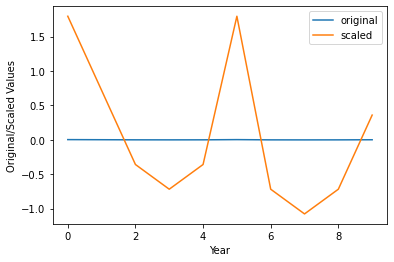

In [48]:
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]
scaled_data = whiten(rate_cuts)
plt.plot(rate_cuts, label="original")
plt.plot(scaled_data, label="scaled")
plt.xlabel("Year")
plt.ylabel("Original/Scaled Values")
plt.legend()
plt.show()

### FIFA 18: Normalize data

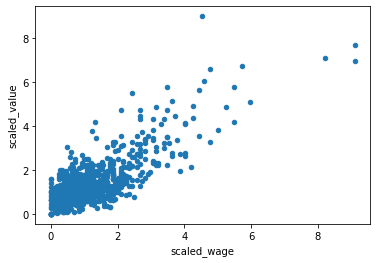

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [55]:
fifa = pd.read_csv("fifa_18_sample_data.csv")
fifa["scaled_wage"] = whiten(fifa["eur_wage"])
fifa["scaled_value"] = whiten(fifa["eur_value"])
fifa.plot(x="scaled_wage", y="scaled_value", kind="scatter")
plt.show()
print(fifa[["scaled_wage", "scaled_value"]].describe())